# Person Posture identification by sensors attached to him

In [ ]:
import pandas as pd
import numpy as np
# some exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [72]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [67]:
dataset = pd.read_csv("Person_posture_local.csv", header = None)
#Add labels for columns so its easy to work with data
dataset.columns = ["SequenceName", "Tag", "timestamp", "date", "x", "y", "z", "activity"]

In [68]:
dataset.head(10)

,SequenceName,Tag,timestamp,date,x,y,z,activity
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking
5,A01,020-000-033-111,633790226052902087,27.05.2009 14:03:25:290,4.364077,1.767691,1.299996,walking
6,A01,020-000-032-221,633790226053172379,27.05.2009 14:03:25:317,4.373908,1.887960,0.769019,walking
7,A01,010-000-024-033,633790226053442677,27.05.2009 14:03:25:343,3.958496,1.703563,0.511041,walking
8,A01,020-000-033-111,633790226053983265,27.05.2009 14:03:25:397,4.244914,1.981682,1.308759,walking
9,A01,010-000-024-033,633790226054523854,27.05.2009 14:03:25:453,4.016991,1.734065,0.193167,walking


In [ ]:
#Convert date field to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format='%d.%m.%Y %H:%M:%S:%f')
dataset[['x','y', 'z']] = dataset[['x','y', 'z']].apply(np.int64)

In [ ]:
dataset.dtypes

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164860 entries, 0 to 164859
Data columns (total 8 columns):
SequenceName    164860 non-null object
Tag             164860 non-null object
timestamp       164860 non-null int64
date            164860 non-null object
x               164860 non-null float64
y               164860 non-null float64
z               164860 non-null float64
activity        164860 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 10.1+ MB


In [73]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

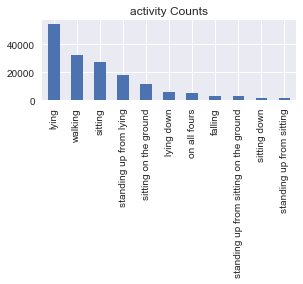

In [75]:
# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
dataset['activity'].value_counts().plot(kind='bar', 
                                         title='activity Counts')

In [79]:
SequenceName_xt = pd.crosstab(dataset['SequenceName'], dataset['activity'])
SequenceName_xt

activity,falling,lying,lying down,on all fours,sitting,sitting down,sitting on the ground,standing up from lying,standing up from sitting,standing up from sitting on the ground,walking
SequenceName,,,,,,,,,,,
A01,80,2184,146,247,1007,74,551,518,42,104,877
A02,96,2129,194,238,1031,51,490,471,32,101,858
A03,94,2094,146,253,983,44,427,551,21,57,656
A04,93,2194,132,225,1025,44,484,464,29,79,633
A05,83,1996,193,213,1005,50,421,488,23,131,621
B01,127,2141,270,216,1063,59,503,706,59,137,1366
B02,101,2091,265,228,909,77,470,646,66,133,1105
B03,95,1871,217,216,905,65,584,583,60,68,1006
B04,84,1960,251,201,953,61,514,606,39,77,1043


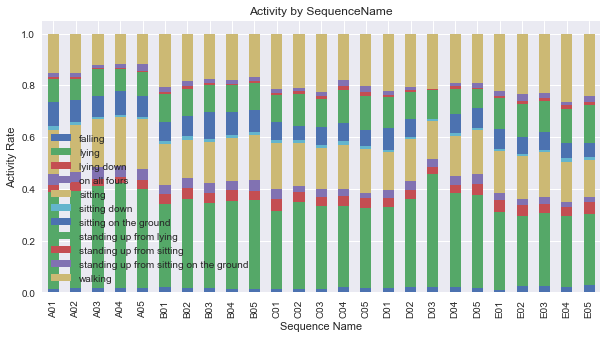

In [84]:
# Normalize the cross tab to sum to 1:
SequenceName_xt_pct = SequenceName_xt.div(pclass_xt.sum(1).astype(float), axis=0)

SequenceName_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Activity by SequenceName')
plt.xlabel('Sequence Name')
plt.ylabel('Activity Rate')
plt.legend(loc='best')

In [85]:
#It is unique and has no significance
#sns.pairplot(dataset.dropna(), hue='activity')

In [86]:
# Mapping activity
dataset['Tag'] = dataset['Tag'].map( {'010-000-024-033': 'ANKLE_LEFT', '010-000-030-096':'ANKLE_RIGHT',
                                       '020-000-033-111': 'CHEST', '020-000-032-221': 'BELT'} )

In [88]:
dataset.head(10)

,SequenceName,Tag,timestamp,date,x,y,z,activity
0,A01,ANKLE_LEFT,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,CHEST,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,BELT,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,ANKLE_LEFT,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,ANKLE_RIGHT,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking
5,A01,CHEST,633790226052902087,27.05.2009 14:03:25:290,4.364077,1.767691,1.299996,walking
6,A01,BELT,633790226053172379,27.05.2009 14:03:25:317,4.373908,1.887960,0.769019,walking
7,A01,ANKLE_LEFT,633790226053442677,27.05.2009 14:03:25:343,3.958496,1.703563,0.511041,walking
8,A01,CHEST,633790226053983265,27.05.2009 14:03:25:397,4.244914,1.981682,1.308759,walking
9,A01,ANKLE_LEFT,633790226054523854,27.05.2009 14:03:25:453,4.016991,1.734065,0.193167,walking


In [89]:
tag_xt = pd.crosstab(dataset['Tag'], dataset['activity'])
tag_xt

activity,falling,lying,lying down,on all fours,sitting,sitting down,sitting on the ground,standing up from lying,standing up from sitting,standing up from sitting on the ground,walking
Tag,,,,,,,,,,,
ANKLE_LEFT,790,14379,1666,1300,7206,469,2982,4904,384,742,8704
ANKLE_RIGHT,780,14095,1670,1431,6803,424,2989,4890,358,725,8395
BELT,789,14076,1517,1328,7323,451,3080,4599,366,732,8712
CHEST,614,11930,1315,1151,5912,362,2728,3968,273,649,6899


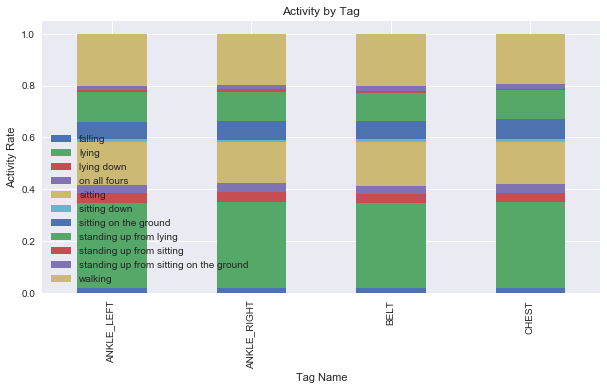

In [91]:
# Normalize the cross tab to sum to 1:
tag_xt_pct = tag_xt.div(tag_xt.sum(1).astype(float), axis=0)

tag_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Activity by Tag')
plt.xlabel('Tag Name')
plt.ylabel('Activity Rate')
plt.legend(loc='best')

In [53]:
#Round time to nearest 100ms so we can get sensor data from all four sensors onto one row. 
#Data from all sensors at any given point will tell the complete story of the posture of the person
#By looking at data it seems data is 30ms apart from sensor to sensor. If we round to nearest 100ms,
#we can capture data from all four sensors onto one row.
# Sort dataframe by multiple columns
df = dataset.sort_values(by = ['SequenceName','date'],ascending=[1,1])
df.index = df['date']
def time_to_200_ms(dt):
    ms = np.floor(dt.microsecond / 1e5)
    ms = ms # 

- (ms % 2) # substracting (ms % 2) to round to nearest 120 milliseconds
    return "%s:%.6f%s" % (
        dt.strftime('%Y-%m-%d %H:%M'),
        float("%.6f" % (dt.second + ms / 10)),
        dt.strftime('%z')
    )   

df['date_rounded'] = df.index.map(time_to_200_ms)
df['date_rounded'] = pd.to_datetime(df['date_rounded'], format='%Y-%m-%d %H:%M:%S.%f')

In [54]:
#Flatten data at nearest 120ms time frame. We will 'ANKLE_LEFT' samples as base and turn x, y, z values of adjusant 
#'ANKLE_RIGHT', 'BELT', 'CHEST' rows as 'ANKLE_RIGHT_x', 'ANKLE_RIGHT_y','ANKLE_RIGHT_z', 'BELT_x',  'BELT_y', 'BELT_z',
#'CHEST_x', 'CHEST_y', 'CHEST_z' on this base row. Then we remove 'ANKLE_RIGHT', 'BELT', 'CHEST' rows from data.
# Group by SequenceName, date_rounded, Tag
small_df = df.groupby([df['SequenceName'],df['date_rounded'], df['Tag']], as_index=False)
small_df = df[~df.duplicated(['SequenceName', 'date_rounded', 'Tag'])]

small_df = small_df.set_index(['SequenceName', 'date_rounded'])
grouped = small_df.groupby('Tag')

new_grouped = []
sensor_names = {'ANKLE_RIGHT', 'BELT', 'CHEST'}
xyz_names = {'y', 'x', 'z'}
columns_names = list(small_df) + ['{}_{}'.format(i, j) for i in sensor_names for j in xyz_names]
#create ANKLE_LEFT group. We will use this group as main and translate other groups into this
ankle_left_group = grouped.get_group('ANKLE_LEFT')
ankle_left_group = pd.concat([ankle_left_group,pd.DataFrame(columns=columns_names)])

for key, group in grouped:
    if(key in sensor_names):
        for i in xyz_names:
            ankle_left_group[key + '_' + i] = group[group.Tag == key][i]

#Fill missing values with previous known good values
ankle_left_group.fillna(method='ffill', inplace=True)
#if First value is missing, we can't fill from previous value. So fill from next value
ankle_left_group.fillna(method='bfill', inplace=True)
   
new_grouped.append(ankle_left_group)

final_df = pd.concat(new_grouped).reset_index()
final_df = final_df.sort_values(["SequenceName", "date_rounded"], ascending=[True, True])
#rename x,y and z columns to ANKLE_LEFT_x, ANKLE_LEFT_y and ANKLE_LEFT_z
final_df.rename(columns={'x': 'ANKLE_LEFT_x', 'y': 'ANKLE_LEFT_y', 'z': 'ANKLE_LEFT_z' }, inplace=True)

In [55]:
#Clean up data and drop unnecessary columns from data
#Drop unnecessary columns
drop_columns = {'Tag', 'timestamp', 'date', 'date_rounded', 'SequenceName'}
final_df  = final_df.drop(drop_columns, axis=1)

#Reorder Columns
sensor_names = {'ANKLE_LEFT', 'ANKLE_RIGHT', 'BELT', 'CHEST'}
final_measure_column_order = ['{}_{}'.format(i, j) for i in sensor_names for j in xyz_names] 
final_df = final_df[final_measure_column_order+ ['activity']]
final_df[final_measure_column_order] = final_df[final_measure_column_order].apply(np.int64)
final_df.head(10)

,BELT_x,BELT_y,BELT_z,ANKLE_RIGHT_x,ANKLE_RIGHT_y,ANKLE_RIGHT_z,CHEST_x,CHEST_y,CHEST_z,ANKLE_LEFT_x,ANKLE_LEFT_y,ANKLE_LEFT_z,activity
0,4,1,0,4,2,0,4,1,1,4,1,0,walking
1,4,1,0,4,2,0,4,1,1,4,1,0,walking
2,4,1,0,4,2,0,4,1,1,3,1,0,walking
3,4,1,0,4,2,0,4,1,1,4,1,0,walking
4,4,1,0,4,2,0,4,2,1,3,2,0,walking
5,4,1,0,4,1,0,4,2,1,3,2,0,walking
6,4,1,0,4,1,0,4,2,1,4,1,0,walking
7,4,1,0,4,1,0,4,2,1,4,1,0,walking
8,4,1,0,4,1,0,4,1,1,4,1,0,walking
9,4,1,0,4,2,0,4,2,1,3,1,0,walking


In [56]:
# Output the files, so we don't have to do the preprocessing again.
final_df.to_csv("Person_posture_local_cleaned.csv", index=False)

In [57]:
#Load formatted data
dataset = pd.read_csv("Person_posture_local_cleaned.csv")

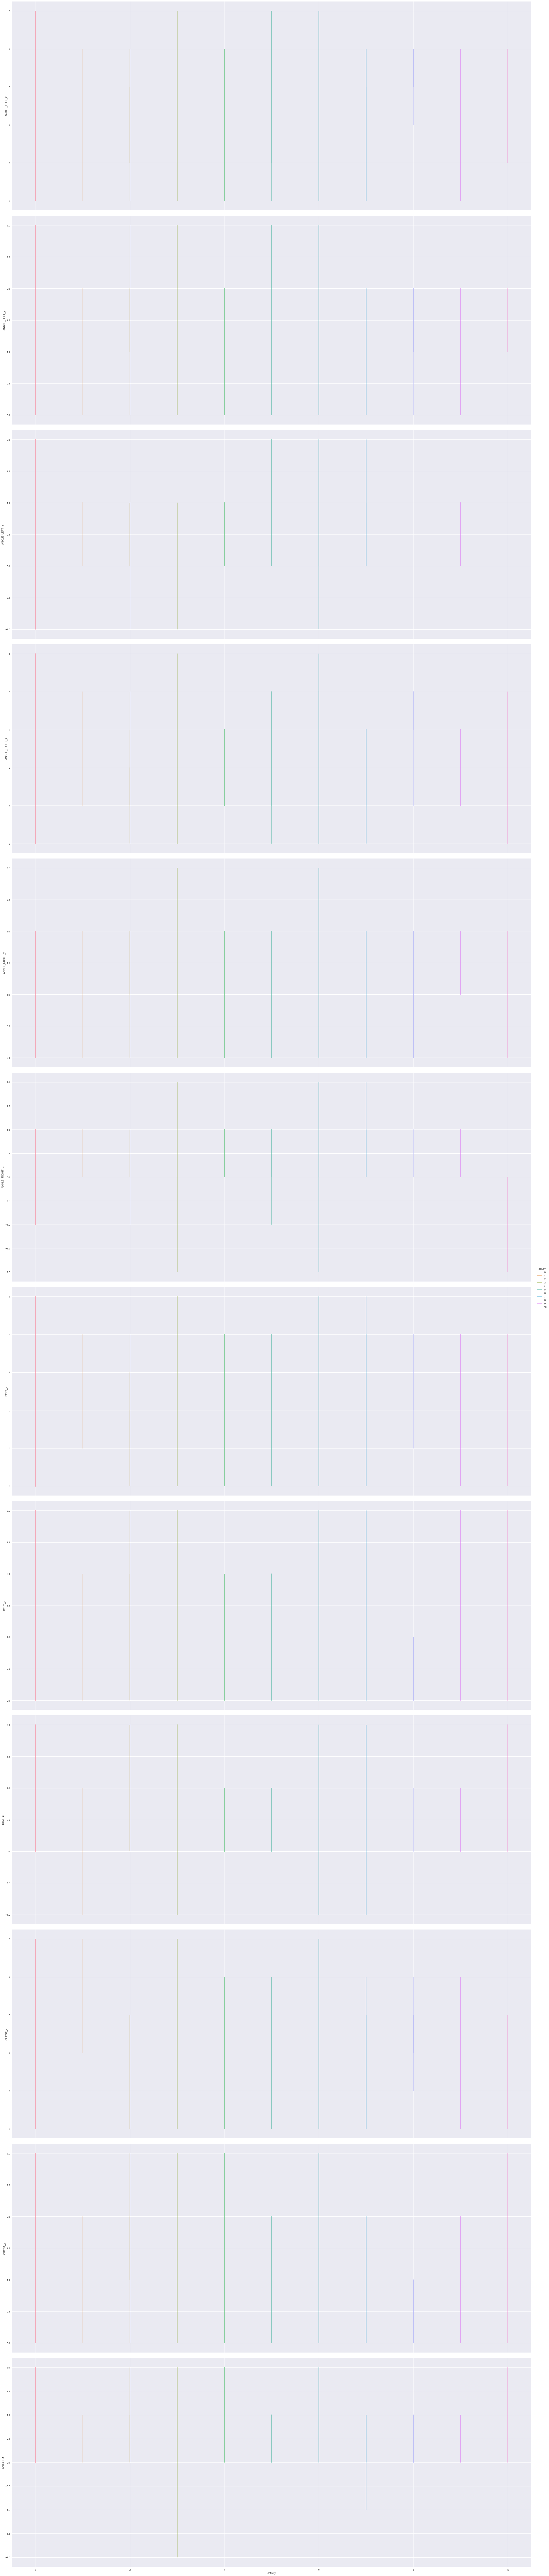

In [58]:
# Mapping 'activity' column
target_names = {'walking': 0, 'falling': 1, 'lying down': 2, 'lying':3, 'sitting down':4,
                                               'sitting':5,'standing up from lying':6,'on all fours':7,'sitting on the ground':8,
                                               'standing up from sitting':9,'standing up from sitting on the ground':10}
dataset['activity'] = dataset['activity'].map(target_names).astype(int)

g = sns.PairGrid(data=dataset,
                 x_vars='activity',
                 y_vars=['ANKLE_LEFT_x','ANKLE_LEFT_y','ANKLE_LEFT_z', 'ANKLE_RIGHT_x','ANKLE_RIGHT_y','ANKLE_RIGHT_z', 
                         'BELT_x','BELT_y','BELT_z', 'CHEST_x','CHEST_y','CHEST_z'],
                 hue="activity", size=3, aspect=2.5)
g = g.map(plt.plot, alpha=0.5)
g = g.add_legend()


X = dataset.iloc[:, 0:12].values
Y = dataset.iloc[:, 12].values

/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
0,8703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14379.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1666.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,14379.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,5737.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,7205.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
6,4904.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
7,14379.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
8,2982.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0


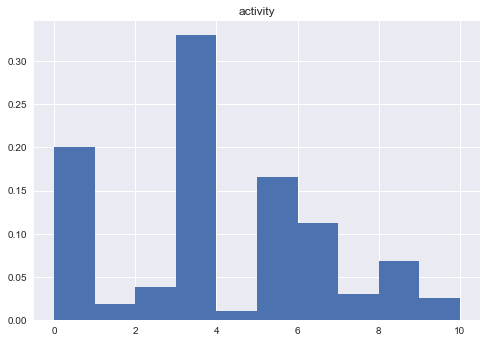

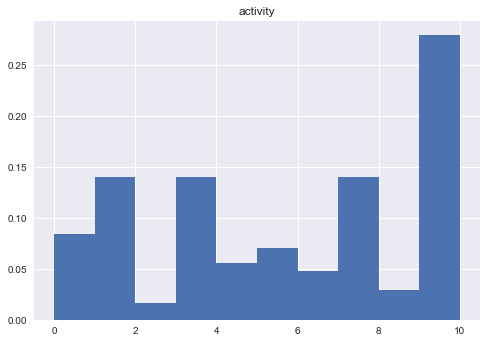

In [59]:
#################################################################################################### 
#                                       Apply SMOTE to resample minority                           #
####################################################################################################
from smote_resampling import apply_SMOTE_resampling
#Plot activity column to see if data is balanced or not
dataset.hist(column = 'activity', normed = True)
dataset.groupby('activity')['activity'].describe()
#Based on histogram, there are five(classes 1, 2, 4, 7, 9) classes that have very few observations
#than rest. This is an inbalanced data. Use SMOTE to over sample minority classes to bring them up
#to same level as rest of the classes. Resample 5 times to balance all 5 minority classes
imbalanced_classes_count = 5
for i in range(0, imbalanced_classes_count):
    X, Y = apply_SMOTE_resampling(X, Y)

df = pd.DataFrame(list(Y), columns=['activity'])

#Plot dataset again to see how balanced data is now
df.hist(column = 'activity', normed = True)
df.groupby('activity')['activity'].describe()

In [60]:
#################################################################################################### 
#                                       Split data into training and test sets                     #
####################################################################################################
#splitting dataset into test and train sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [61]:
#################################################################################################### 
#                                       Do a quick check with multiple                             #
#                                   algorithms to get pulse of the problem                         #
####################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

{'AdaBoostClassifier': 0.42903343023255813, 'RandomForestClassifier': 0.77460029069767444, 'GaussianNB': 0.34687499999999999, 'GradientBoostingClassifier': 0.12648982558139535}


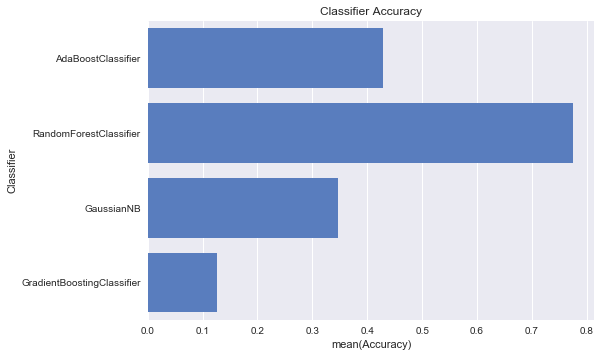

In [45]:
classifiers = [
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                               max_depth=1, random_state=0)
    ]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_X
y = train_y

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

print(acc_dict)
#
# """
# >>> print(acc_dict)
# {'AdaBoostClassifier': 0.44884882710686363, 'RandomForestClassifier': 0.85488705473501303, 'GaussianNB': 0.27128583840139003, 'GradientBoostingClassifier': 0.79443961772371852}
# >>>

In [46]:
#With quick checking above, it seems RandomForest seems to be more accurate for our problem
#################################################################################################### 
#                        Use GridSearch to fine tune RandomForstClassifier(RFC)                 #
####################################################################################################
#Making K-Fold cross validation 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators = 240, criterion = 'gini', 
                                    max_depth = 20,min_samples_split=5, 
                                    random_state = 0, bootstrap = True)

accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_y, cv = 10)
accuracies.mean()
accuracies.std()

#Apply Grid Search to find optimal model and the optimal (hyper)parameters
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = { "n_estimators"     : [235, 240, 244],
                   "criterion"          : ["gini"],
                   "max_depth"          : [18, 20, 22],
                   "min_samples_split"  : [5] ,
                   "bootstrap"          : [True]}

scores = ['accuracy'] #, 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(random_state=0), tuned_parameters, cv=5, scoring=score)
    clf.fit(train_X, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_y, clf.predict(test_X)
    print(classification_report(y_true, y_pred))
    print()

best_accuracy = clf.best_score_
best_params = clf.best_params_
print(best_params)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=235, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

Grid scores on development set:

0.778 (+/-0.001) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 5, 'n_estimators': 235}
0.779 (+/-0.001) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 5, 'n_estimators': 240}
0.779 (+/-0.001) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 5, 'n_estimators': 244}
0.779 (+/-0.001) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 235}
0.77

/Users/muralikorrapati/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1855
          1       0.25      0.06      0.10       185
          2       0.43      0.12      0.19       341
          3       0.84      0.96      0.89      3004
          4       0.43      0.09      0.16        95
          5       0.77      0.89      0.83      1492
          6       0.60      0.36      0.45      1060
          7       0.62      0.56      0.59       285
          8       0.71      0.90      0.79       609
          9       0.25      0.06      0.10        82
         10       0.49      0.20      0.29       163

avg / total       0.74      0.78      0.74      9171


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 235}


In [62]:
#################################################################################################### 
#                            Use best fit hyperparameters we learned in grid search                #
#                                    see result of print(best_params) above                        #
####################################################################################################
#Fitting Random Forest Classifier to training set
###Create Your classifier here
classifier = RandomForestClassifier(n_estimators = 235, criterion = 'gini', 
                                    max_depth = 20,min_samples_split=5, 
                                    random_state = 0, bootstrap = True)
classifier.fit(train_X, train_y)

#Predicting test set results
y_pred = classifier.predict(test_X)

#Calculate measurements
#-----------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn import metrics
def calc_measurements(test_y, y_pred, target_names):
    kappa = cohen_kappa_score(test_y, y_pred)
    classifi_report = classification_report(test_y, y_pred) #, target_names=target_names)
    #testing score
    #F1_score = metrics.f1_score(test_y, y_pred, pos_label=list(set(test_y)))
    accuracy = metrics.accuracy_score(test_y, y_pred)
    print(classifi_report)
    print('SCORE = {}'.format(accuracy))
    print('Kappa = {}'.format(kappa))
    
calc_measurements(test_y, y_pred, target_names)

             precision    recall  f1-score   support

          0       0.80      0.86      0.83      2120
          1       0.84      0.95      0.90      3546
          2       0.65      0.12      0.20       443
          3       0.86      0.89      0.87      3566
          4       0.85      0.88      0.86      1445
          5       0.83      0.77      0.80      1854
          6       0.63      0.28      0.39      1234
          7       0.91      0.97      0.94      3541
          8       0.74      0.82      0.78       767
          9       0.90      0.92      0.91      3590
         10       0.92      0.91      0.91      3667

avg / total       0.85      0.86      0.85     25773

SCORE = 0.8609397431420479
Kappa = 0.8422106857027233


In [63]:

cm = confusion_matrix(test_y, y_pred)
print(cm)

[[1824   70    6    4   39   73   19    8    1   39   37]
 [  59 3383    0   40    8   12    4    0   31    3    6]
 [  49    0   51  129    9   26   98   46    0   33    2]
 [   4  183    5 3173    1    9   68  114    5    2    2]
 [  48    9    1    1 1265   25    0   13    1   60   22]
 [  78   12    1    3   77 1432    8   71   28  127   17]
 [  84  134   15  330   18   48  347   94   73   26   65]
 [   2    3    0   23   14   24    7 3444    0   16    8]
 [   2   23    0    6   21   30    0    0  631    0   54]
 [ 116   35    0    0   19   29    0    2    3 3307   79]
 [  25  152    0    0   18    8    1    2   84   45 3332]]


OneVsRestClassifier Score: 0.719924639279478


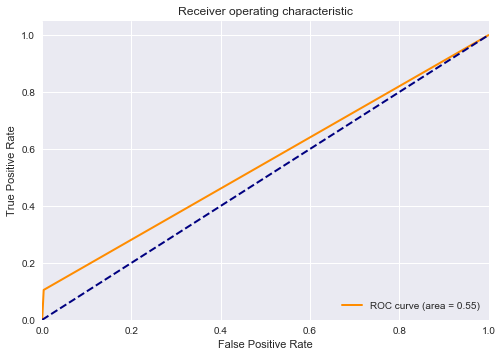

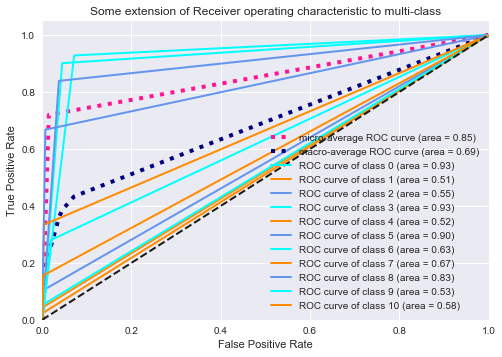

In [64]:
#################################################################################################### 
#                                       OneVsRestClassifier                                        #
#################################################################################################### 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


#Load formatted data
dataset = pd.read_csv("Person_posture_local_cleaned.csv")

# Mapping activity
dataset['activity'] = dataset['activity'].map( {'walking': 0, 'falling': 1, 'lying down': 2, 'lying':3, 'sitting down':4,
                                               'sitting':5,'standing up from lying':6,'on all fours':7,'sitting on the ground':8,
                                               'standing up from sitting':9,'standing up from sitting on the ground':10} ).astype(int)

X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, 12].values


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 240, criterion = 'gini', 
                                    max_depth = 20,min_samples_split=5, 
                                    random_state = 0, bootstrap = True))
y_score = classifier.fit(X_train, y_train).predict(X_test)

#Get accuracy of the classifier
accuracy = classifier.score(X_test, y_test, sample_weight=None)
print('OneVsRestClassifier Score: {}'.format(accuracy))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [65]:
print('OneVsRestClassifier Score: {}'.format(accuracy))

OneVsRestClassifier Score: 0.719924639279478
